In [1]:
import os
os.getcwd()
os.chdir('/home/sachin/Data Science/Datasets')

In [2]:
import  pandas as pd
#df = pd.read_csv("H-1B_Disclosure_Data_FY17.csv")
#df.to_pickle("H-1B_Disclosure_Data_FY17.pkl")
df= pd.read_pickle("H-1B_Disclosure_Data_FY17.pkl")
df.columns

Index(['Unnamed: 0', 'CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED',
       'DECISION_DATE', 'VISA_CLASS', 'EMPLOYMENT_START_DATE',
       'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_BUSINESS_DBA',
       'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_STATE',
       'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE',
       'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS',
       'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LAB

In [3]:
#set to see all columns and rows in using .head()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,NaN,2244050900,NaN,Y,"ELLSWORTH, CHAD",NEW YORK,NY,ASSOCIATE DATA INTEGRATION,15-1121,COMPUTER SYSTEMS ANALYSTS,522210,1,1,0,0,0,0,0,Y,59197.0,Year,Level I,OES,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,NaN,2244050900,NaN,Y,"ELLSWORTH, CHAD",NEW YORK,NY,SENIOR ASSOCIATE,15-2031,OPERATIONS RESEARCH ANALYSTS,522210,1,1,0,0,0,0,0,Y,49800.0,Year,NaN,Other,2015.0,TOWERS WATSON DATA SERVICES 2015 CSR PROFESSIO...,53000.0,57200.0,Year,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,1211 31ST ST. NW,WASHINGTON,DC,20007,UNITED STATES OF AMERICA,NaN,2022953000,NaN,Y,"BURKE, KAREN",WASHINGTON,DC,.NET SOFTWARE PROGRAMMER,15-1131,COMPUTER PROGRAMMERS,541511,2,2,0,0,0,0,0,Y,76502.0,Year,Level II,OES,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,17177 NORTH LAUREL PARK DR,LIVONIA,MI,48152,UNITED STATES OF AMERICA,NaN,7343776007,NaN,N,",",NaN,NaN,PROJECT MANAGER,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",541511,1,1,0,0,0,0,0,Y,90376.0,Year,Level III,OES,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaN
4,4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NaN,223 WEST NASH STREET,WILSON,NC,27893,UNITED STATES OF AMERICA,NaN,2522462031,NaN,Y,"SCOFIELD, EILEEN",ATLANTA,GA,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,13-2041,CREDIT ANALYSTS,522110,1,0,0,0,0,1,0,Y,116605.0,Year,Level III,OES,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036,2015-02-26


In [5]:
df.WAGE_UNIT_OF_PAY.value_counts()

Year         585417
Hour          38405
Month           502
Week            188
Bi-Weekly       130
Name: WAGE_UNIT_OF_PAY, dtype: int64

In [6]:
df["VISA_CLASS"].value_counts()

H-1B               610304
E-3 Australian      12157
H-1B1 Singapore      1254
H-1B1 Chile           935
Name: VISA_CLASS, dtype: int64

In [7]:
df.shape

(624650, 53)

In [8]:
#Only consider data points with Visa Class - H1B as our problem does not required others

In [9]:
df = df[df['VISA_CLASS'] == 'H-1B']

In [10]:
df.shape

(610304, 53)

In [11]:
#Drop unwanted columns
drop = ["Unnamed: 0", "CASE_NUMBER", "EMPLOYER_BUSINESS_DBA", 'EMPLOYER_ADDRESS', 'EMPLOYER_CITY', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE','EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'SOC_CODE', 'PUBLIC_DISCLOSURE_LOCATION', 'WORKSITE_CITY', 'WORKSITE_COUNTY','WORKSITE_POSTAL_CODE', 'ORIGINAL_CERT_DATE']

In [12]:
df = df.drop(drop,1)

In [13]:
df.columns

Index(['CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS',
       'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
       'WORKSITE_STATE'],
      dtype='object')

In [14]:
df.shape

(610304, 35)

In [15]:
#Display all columns with null values %
x = df.isnull().sum()/df.shape[0]*100
x

CASE_STATUS                     0.000000
CASE_SUBMITTED                  0.000000
DECISION_DATE                   0.000000
VISA_CLASS                      0.000000
EMPLOYMENT_START_DATE           0.003932
EMPLOYMENT_END_DATE             0.003932
EMPLOYER_NAME                   0.008848
EMPLOYER_STATE                  0.002949
AGENT_REPRESENTING_EMPLOYER    15.228640
AGENT_ATTORNEY_STATE           46.139956
JOB_TITLE                       0.000819
SOC_NAME                        0.000492
NAICS_CODE                      0.001147
TOTAL_WORKERS                   0.000000
NEW_EMPLOYMENT                  0.000000
CONTINUED_EMPLOYMENT            0.000000
CHANGE_PREVIOUS_EMPLOYMENT      0.000000
NEW_CONCURRENT_EMPLOYMENT       0.000000
CHANGE_EMPLOYER                 0.000000
AMENDED_PETITION                0.000000
FULL_TIME_POSITION              0.000819
PREVAILING_WAGE                 0.000164
PW_UNIT_OF_PAY                  0.005243
PW_WAGE_LEVEL                  19.573524
PW_SOURCE       

In [16]:
#Show column with null value % > 30%
drop_cols = x[x>30]
drop_cols

AGENT_ATTORNEY_STATE    46.139956
SUPPORT_H1B             60.604551
LABOR_CON_AGREE         59.924234
dtype: float64

In [17]:
#create list of columns need to be dropped
drop_cols = list(drop_cols.index)
drop_cols

['AGENT_ATTORNEY_STATE', 'SUPPORT_H1B', 'LABOR_CON_AGREE']

In [18]:
#remove the columns with null value % > 30%
df = df.drop(drop_cols,1)
drop_cols

['AGENT_ATTORNEY_STATE', 'SUPPORT_H1B', 'LABOR_CON_AGREE']

In [19]:
df = df.drop("JOB_TITLE",1)

In [20]:
df.isnull().sum() / df.shape[0]*100

CASE_STATUS                     0.000000
CASE_SUBMITTED                  0.000000
DECISION_DATE                   0.000000
VISA_CLASS                      0.000000
EMPLOYMENT_START_DATE           0.003932
EMPLOYMENT_END_DATE             0.003932
EMPLOYER_NAME                   0.008848
EMPLOYER_STATE                  0.002949
AGENT_REPRESENTING_EMPLOYER    15.228640
SOC_NAME                        0.000492
NAICS_CODE                      0.001147
TOTAL_WORKERS                   0.000000
NEW_EMPLOYMENT                  0.000000
CONTINUED_EMPLOYMENT            0.000000
CHANGE_PREVIOUS_EMPLOYMENT      0.000000
NEW_CONCURRENT_EMPLOYMENT       0.000000
CHANGE_EMPLOYER                 0.000000
AMENDED_PETITION                0.000000
FULL_TIME_POSITION              0.000819
PREVAILING_WAGE                 0.000164
PW_UNIT_OF_PAY                  0.005243
PW_WAGE_LEVEL                  19.573524
PW_SOURCE                       0.005079
PW_SOURCE_YEAR                  0.005079
PW_SOURCE_OTHER 

In [21]:
df["PW_WAGE_LEVEL"] = df["PW_WAGE_LEVEL"].fillna("Other")
df["AGENT_REPRESENTING_EMPLOYER"] = df["AGENT_REPRESENTING_EMPLOYER"].fillna("Unknown")
df["H1B_DEPENDENT"] = df["H1B_DEPENDENT"].fillna("Unknown")
df["WILLFUL_VIOLATOR"] = df["WILLFUL_VIOLATOR"].fillna("Unknown")

In [22]:
df = df.drop("PW_SOURCE_OTHER",1)

In [23]:
#replace remaining column null values with mode values
cols = df.columns
for column in cols:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [24]:
df.isnull().sum()

CASE_STATUS                    0
CASE_SUBMITTED                 0
DECISION_DATE                  0
VISA_CLASS                     0
EMPLOYMENT_START_DATE          0
EMPLOYMENT_END_DATE            0
EMPLOYER_NAME                  0
EMPLOYER_STATE                 0
AGENT_REPRESENTING_EMPLOYER    0
SOC_NAME                       0
NAICS_CODE                     0
TOTAL_WORKERS                  0
NEW_EMPLOYMENT                 0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
FULL_TIME_POSITION             0
PREVAILING_WAGE                0
PW_UNIT_OF_PAY                 0
PW_WAGE_LEVEL                  0
PW_SOURCE                      0
PW_SOURCE_YEAR                 0
WAGE_RATE_OF_PAY_FROM          0
WAGE_RATE_OF_PAY_TO            0
WAGE_UNIT_OF_PAY               0
H1B_DEPENDENT                  0
WILLFUL_VIOLATOR               0
WORKSITE_STATE                 0
dtype: int

In [25]:
df["CASE_SUBMITTED"] = pd.to_datetime(df["CASE_SUBMITTED"])
df["DECISION_DATE"] = pd.to_datetime(df["DECISION_DATE"])
df["DECISION_DAYS"] = (df["DECISION_DATE"] - df["CASE_SUBMITTED"]).dt.days
df = df.drop(["CASE_SUBMITTED","DECISION_DATE"],1)
 
df = df[df["PW_SOURCE_YEAR"]>1900]  
df["PW_SOURCE_DURATION"] = 2019 - df["PW_SOURCE_YEAR"]
df = df.drop(["PW_SOURCE_YEAR"],1)

df["EMPLOYMENT_END_DATE"]= pd.to_datetime(df["EMPLOYMENT_END_DATE"])
df["EMPLOYMENT_START_DATE"] = pd.to_datetime(df["EMPLOYMENT_START_DATE"])
df["EMPLOYMENT_DURATION"] = (df["EMPLOYMENT_END_DATE"] - df["EMPLOYMENT_START_DATE"]).dt.days
df = df.drop(["EMPLOYMENT_END_DATE","EMPLOYMENT_START_DATE"],1)

In [26]:
#Transforming Wage columns to same unit "Year"
df.loc[df["PW_UNIT_OF_PAY"]=="Month","PREVAILING_WAGE"] = df.loc[df["PW_UNIT_OF_PAY"]=="Month","PREVAILING_WAGE"]*12
df.loc[df["PW_UNIT_OF_PAY"]=="Bi-Weekly","PREVAILING_WAGE"] = df.loc[df["PW_UNIT_OF_PAY"]=="Bi-Weekly","PREVAILING_WAGE"]*26
df.loc[df["PW_UNIT_OF_PAY"]=="Week","PREVAILING_WAGE"] = df.loc[df["PW_UNIT_OF_PAY"]=="Week","PREVAILING_WAGE"]*52
df.loc[df["PW_UNIT_OF_PAY"]=="Hour","PREVAILING_WAGE"] = df.loc[df["PW_UNIT_OF_PAY"]=="Hour","PREVAILING_WAGE"]*8*5*52

df = df.drop("PW_UNIT_OF_PAY",1)

df.loc[df["WAGE_UNIT_OF_PAY"]=="Month","WAGE_RATE_OF_PAY_FROM"] = df.loc[df["WAGE_UNIT_OF_PAY"]=="Month","WAGE_RATE_OF_PAY_FROM"]*12
df.loc[df["WAGE_UNIT_OF_PAY"]=="Bi-Weekly","WAGE_RATE_OF_PAY_FROM"] = df.loc[df["WAGE_UNIT_OF_PAY"]=="Bi-Weekly","WAGE_RATE_OF_PAY_FROM"]*26
df.loc[df["WAGE_UNIT_OF_PAY"]=="Week","WAGE_RATE_OF_PAY_FROM"] = df.loc[df["WAGE_UNIT_OF_PAY"]=="Week","WAGE_RATE_OF_PAY_FROM"]*52
df.loc[df["WAGE_UNIT_OF_PAY"]=="Hour","WAGE_RATE_OF_PAY_FROM"] = df.loc[df["WAGE_UNIT_OF_PAY"]=="Hour","WAGE_RATE_OF_PAY_FROM"]*8*5*52

df.loc[df["WAGE_UNIT_OF_PAY"]=="Month","WAGE_RATE_OF_PAY_TO"] = df.loc[df["WAGE_UNIT_OF_PAY"]=="Month","WAGE_RATE_OF_PAY_TO"]*12
df.loc[df["WAGE_UNIT_OF_PAY"]=="Bi-Weekly","WAGE_RATE_OF_PAY_TO"] = df.loc[df["WAGE_UNIT_OF_PAY"]=="Bi-Weekly","WAGE_RATE_OF_PAY_TO"]*26
df.loc[df["WAGE_UNIT_OF_PAY"]=="Week","WAGE_RATE_OF_PAY_TO"] = df.loc[df["WAGE_UNIT_OF_PAY"]=="Week","WAGE_RATE_OF_PAY_TO"]*52
df.loc[df["WAGE_UNIT_OF_PAY"]=="Hour","WAGE_RATE_OF_PAY_TO"] = df.loc[df["WAGE_UNIT_OF_PAY"]=="Hour","WAGE_RATE_OF_PAY_TO"]*8*5*52

df = df.drop("WAGE_UNIT_OF_PAY",1)

In [27]:
#Transforming Target into 2 classes
df.loc[df["CASE_STATUS"]=="DENIED","NEW_CASE_STATUS"] = "NOT CERTIFIED"
df.loc[df["CASE_STATUS"]=="WITHDRAWN","NEW_CASE_STATUS"] = "NOT CERTIFIED"
df.loc[df["CASE_STATUS"]=="CERTIFIED-WITHDRAWN","NEW_CASE_STATUS"] = "CERTIFIED-W"
df.loc[df["CASE_STATUS"]=="CERTIFIED","NEW_CASE_STATUS"] = "CERTIFIED"
df = df.drop("CASE_STATUS",1)
df= df[(df["NEW_CASE_STATUS"]=="CERTIFIED") | (df["NEW_CASE_STATUS"]=="NOT CERTIFIED")]

In [28]:
df = df.drop("VISA_CLASS",1)

In [29]:
df.columns

Index(['EMPLOYER_NAME', 'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_WAGE_LEVEL', 'PW_SOURCE',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'H1B_DEPENDENT',
       'WILLFUL_VIOLATOR', 'WORKSITE_STATE', 'DECISION_DAYS',
       'PW_SOURCE_DURATION', 'EMPLOYMENT_DURATION', 'NEW_CASE_STATUS'],
      dtype='object')

In [30]:
df = df.drop("WAGE_RATE_OF_PAY_TO",1)

In [31]:
import numpy as np
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])
cat_not_encoded = df.select_dtypes(exclude=[np.number])

In [32]:
cat = cat.drop("NAICS_CODE",1)

## Data Insights

In [33]:
df.to_pickle("df1.pkl")

In [34]:
dfnew=df

In [35]:
dfnew.head()

,EMPLOYER_NAME,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_WAGE_LEVEL,PW_SOURCE,WAGE_RATE_OF_PAY_FROM,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,DECISION_DAYS,PW_SOURCE_DURATION,EMPLOYMENT_DURATION,NEW_CASE_STATUS
3,INFO SERVICES LLC,MI,N,"COMPUTER OCCUPATIONS, ALL OTHER",541511,1,1,0,0,0,0,0,Y,90376.0,Level III,OES,102000.0,Y,N,NJ,3,3.0,1094,NOT CERTIFIED
16,ITAS INC,IN,Y,COMPUTER SYSTEMS ANALYSTS,541519,1,0,0,0,0,1,0,Y,54600.0,Level I,OES,55000.0,N,N,NY,0,3.0,1094,NOT CERTIFIED
194,CLOUDWICK TECHNOLOGIES INC.,CA,Y,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,1,0,0,0,0,1,0,Y,102149.0,Level I,OES,102149.0,Y,N,CA,6,3.0,1084,CERTIFIED
195,TATA CONSULTANCY SERVICES LIMITED,MD,Y,WEB DEVELOPERS,541511,1,0,0,0,0,0,1,Y,56784.0,Level III,OES,62500.0,Y,N,OH,6,3.0,1089,CERTIFIED
196,"HEALTH MANAGEMENT SYSTEMS, INC.",TX,Y,"SOFTWARE DEVELOPERS, APPLICATIONS",52429,1,0,1,0,0,0,0,Y,85197.0,Level II,OES,90664.0,N,N,TX,6,3.0,1095,CERTIFIED


In [36]:
dfnew.shape

(561421, 24)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
dfnew.columns

Index(['EMPLOYER_NAME', 'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER',
       'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS', 'NEW_EMPLOYMENT',
       'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_WAGE_LEVEL', 'PW_SOURCE',
       'WAGE_RATE_OF_PAY_FROM', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR',
       'WORKSITE_STATE', 'DECISION_DAYS', 'PW_SOURCE_DURATION',
       'EMPLOYMENT_DURATION', 'NEW_CASE_STATUS'],
      dtype='object')

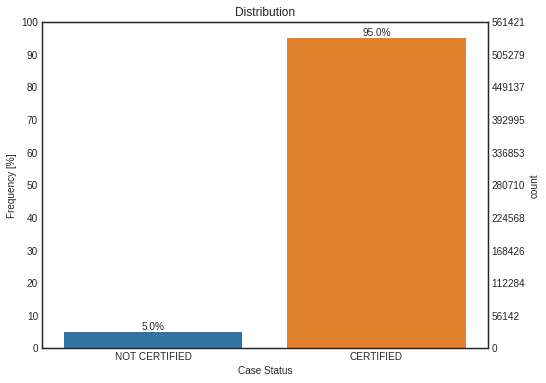

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.style as style


style.use('seaborn-white') #sets the size of the charts

ncount = len(dfnew)

plt.figure(figsize=(8,6))
ax = sns.countplot(x="NEW_CASE_STATUS", data=dfnew)
plt.title('Distribution')
plt.xlabel('Case Status')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax.grid(False)


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = cat.columns
for c in col:
    cat[c] = cat[c].astype("category")
    cat['Original'+str(c)] = cat[c]
    cat[c] = le.fit_transform(cat[c])

In [41]:
cat_encoded = cat[['EMPLOYER_NAME', 'EMPLOYER_STATE', 'AGENT_REPRESENTING_EMPLOYER','SOC_NAME', 'FULL_TIME_POSITION', 'PW_WAGE_LEVEL', 'PW_SOURCE','H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'WORKSITE_STATE','NEW_CASE_STATUS']]

In [42]:
df_tot = pd.concat([num,cat],1)
df = pd.concat([num,cat_encoded],1)

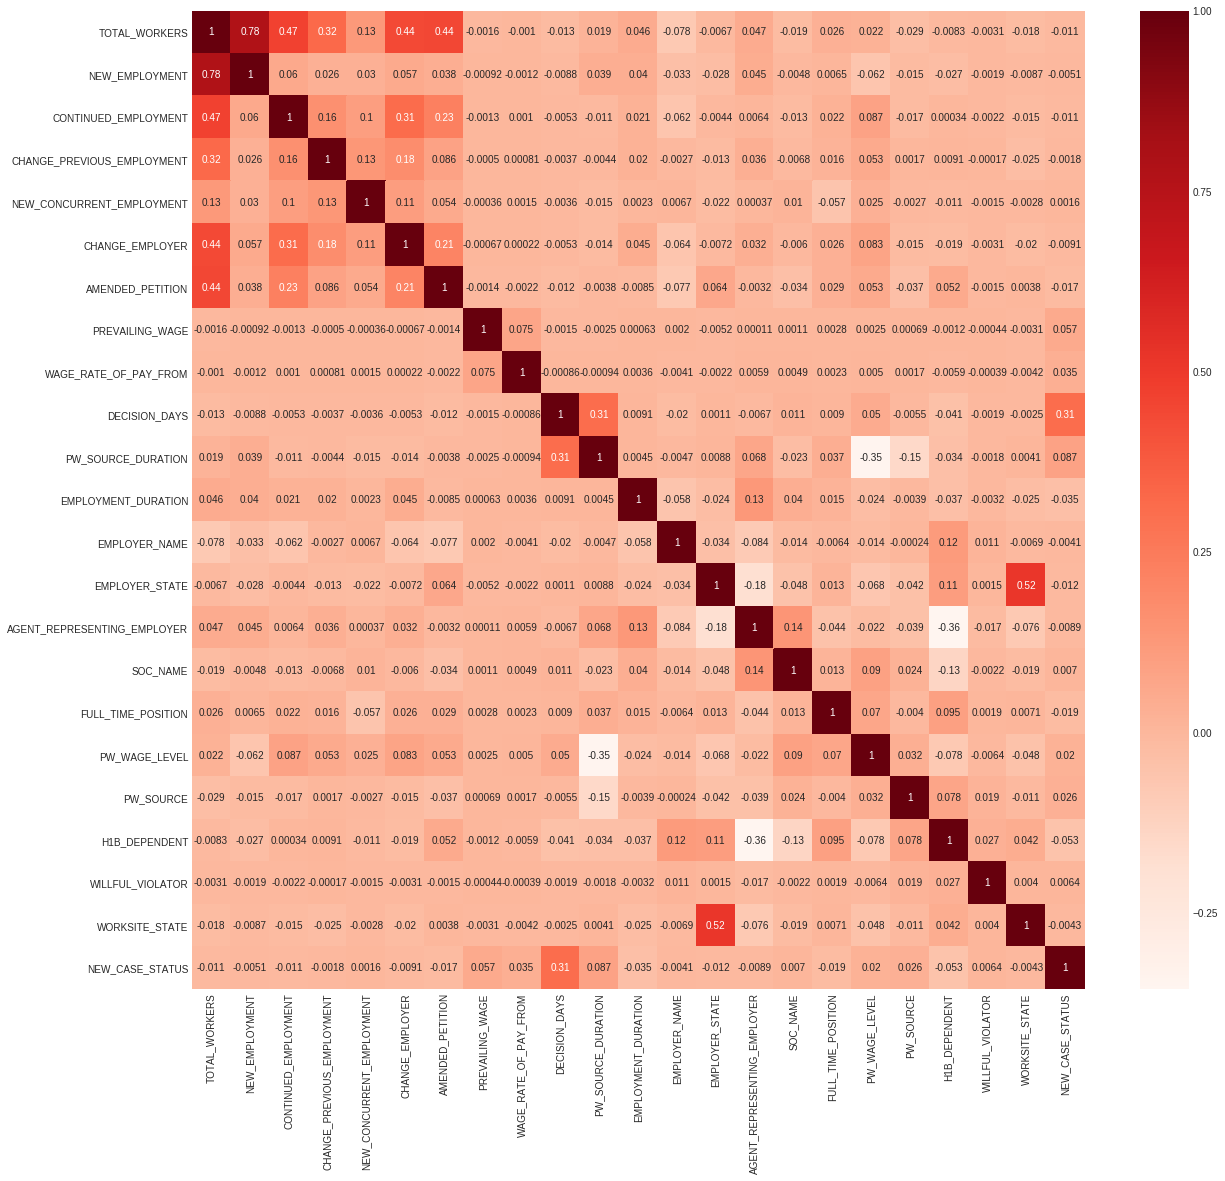

In [43]:
#Using Pearson Correlation
# We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
df.head()

,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,DECISION_DAYS,PW_SOURCE_DURATION,EMPLOYMENT_DURATION,EMPLOYER_NAME,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,SOC_NAME,FULL_TIME_POSITION,PW_WAGE_LEVEL,PW_SOURCE,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,NEW_CASE_STATUS
3,1,1,0,0,0,0,0,90376.0,102000.0,3,3.0,1094,28028,24,0,175,1,2,2,2,0,34,1
16,1,0,0,0,0,1,0,54600.0,55000.0,0,3.0,1094,29707,17,2,198,1,0,2,0,0,37,1
194,1,0,0,0,0,1,0,102149.0,102149.0,6,3.0,1084,12373,5,2,710,1,0,2,2,0,4,0
195,1,0,0,0,0,0,1,56784.0,62500.0,6,3.0,1089,55501,22,2,797,1,2,2,2,0,38,0
196,1,0,1,0,0,0,0,85197.0,90664.0,6,3.0,1095,25425,47,2,710,1,1,2,0,0,48,0


In [45]:
#Correlation with output variable
cor_target = abs(cor["NEW_CASE_STATUS"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

DECISION_DAYS      0.307904
NEW_CASE_STATUS    1.000000
Name: NEW_CASE_STATUS, dtype: float64

In [46]:
##sns.lmplot(data=df,
     ##    x="DECISION_DAYS",
       ##  y="NEW_CASE_STATUS")

# Display the plot
##plt.show()

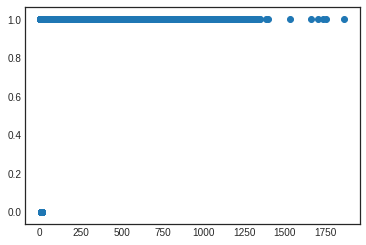

In [47]:
import matplotlib.pyplot as plt
plt.scatter(df["DECISION_DAYS"],df["NEW_CASE_STATUS"])
plt.show()

In [48]:
df[df["NEW_CASE_STATUS"]==0]["DECISION_DAYS"].describe()

count    533620.000000
mean          5.744888
std           0.894924
min           4.000000
25%           6.000000
50%           6.000000
75%           6.000000
max          11.000000
Name: DECISION_DAYS, dtype: float64

In [49]:
df[df["NEW_CASE_STATUS"]==1]["DECISION_DAYS"].describe()

count    27801.000000
mean        87.434948
std        246.064620
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1863.000000
Name: DECISION_DAYS, dtype: float64

In [50]:
df_minor = df[df["NEW_CASE_STATUS"]==1]
df_major = df[df["NEW_CASE_STATUS"]==0]
df_major = df_major.sample(n=40000)
df = pd.concat([df_minor,df_major])

In [51]:
X = df.drop(["NEW_CASE_STATUS", "DECISION_DAYS"],1)
y = df["NEW_CASE_STATUS"]
min_col = list(X)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_s = pd.Series(y_res)

/home/sachin/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Apply Model

In [52]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X_res,y_res,test_size = 0.3,random_state = 42)

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42,n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [54]:
y_pred = rfc.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#accuracy_score(y_train, rfc.predict(X_train))

0.7559166666666667

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_train, rfc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27946
           1       0.99      0.99      0.99     28054

    accuracy                           0.99     56000
   macro avg       0.99      0.99      0.99     56000
weighted avg       0.99      0.99      0.99     56000



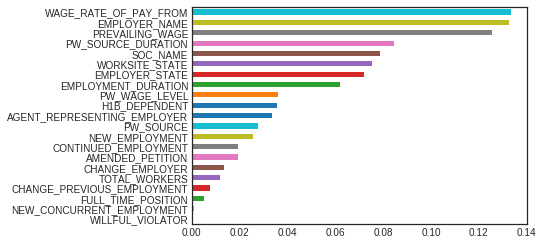

In [57]:
fi = pd.Series(rfc.feature_importances_,index = list(X))
fi = fi.sort_values(ascending = True)
fi.plot(kind="barh")
plt.show()

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [60]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=dt, n_estimators=50,
                            bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred_bag)
#print(classification_report(y_test,y_pred_bag))

0.7554583333333333

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(dt,n_estimators=50)
ada_clf.fit(X_train, y_train.ravel())
y_pred_adb = ada_clf.predict(X_test)
accuracy_score(y_test,y_pred_adb)
#print(classification_report(y_test,y_pred_adb))

0.7132916666666667

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(max_depth= 4)
gbc_clf.fit(X_train, y_train.ravel())
y_pred_gbc = gbc_clf.predict(X_test)
accuracy_score(y_test,y_pred_gbc)

0.7238333333333333

In [63]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train.ravel())
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

0.7115416666666666

## Some more data insights

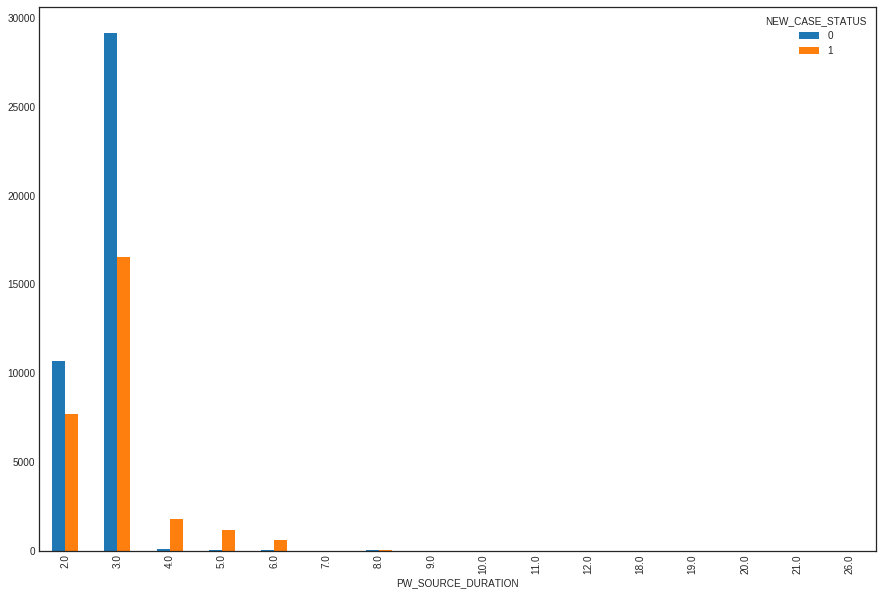

In [64]:
res = df.groupby(['PW_SOURCE_DURATION','NEW_CASE_STATUS']).size().unstack()
res.plot(kind='bar',stacked=False,figsize=(15,10))
plt.show()

In [65]:
d = df[df["NEW_CASE_STATUS"]==0]
emp_certified = d["EMPLOYER_NAME"].value_counts()
top_10_emp_certified = emp_certified.sort_values(ascending = False).head(10)
top_cert = top_10_emp_certified.index.values
top_cert

array([28167, 55501,  9970, 55673, 27137, 15817,   921, 19413, 63281,
       25338])

In [66]:
df_top_10 = df_tot[(df_tot["EMPLOYER_NAME"]==28167) | (df_tot["EMPLOYER_NAME"]==27137) | (df_tot["EMPLOYER_NAME"]==55501) | (df_tot["EMPLOYER_NAME"]==9970) | (df_tot["EMPLOYER_NAME"]==27134) | (df_tot["EMPLOYER_NAME"]==15817) | (df_tot["EMPLOYER_NAME"]==55673) | (df_tot["EMPLOYER_NAME"]==921) | (df_tot["EMPLOYER_NAME"]==19413) | (df_tot["EMPLOYER_NAME"]==63281)]

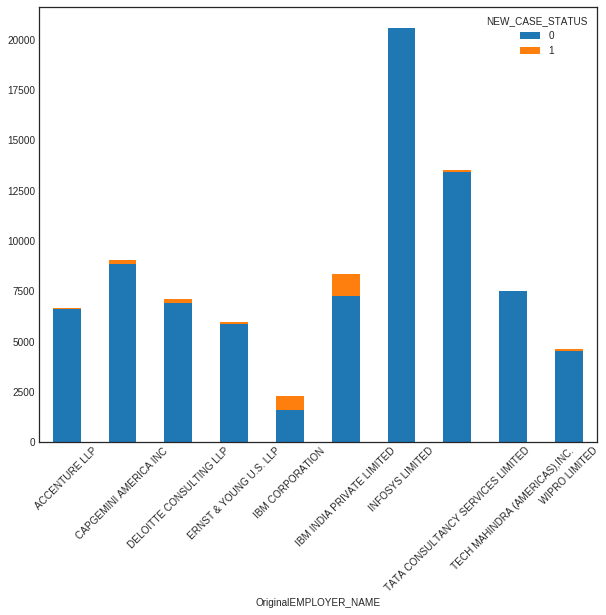

In [67]:
res = df_top_10.groupby(['OriginalEMPLOYER_NAME','NEW_CASE_STATUS']).size().unstack()
res.plot(kind='bar',stacked=True,figsize=(10,8))
plt.xticks(rotation = 45)
plt.show()

In [68]:
df_top_10_soc = df_tot[(df_tot["SOC_NAME"]==738) | (df_tot["SOC_NAME"]==207) | (df_tot["SOC_NAME"]==191) | (df_tot["SOC_NAME"]==183) | (df_tot["SOC_NAME"]==745) | (df_tot["SOC_NAME"]==206) | (df_tot["SOC_NAME"]==486) | (df_tot["SOC_NAME"]==567) | (df_tot["SOC_NAME"]==10) | (df_tot["SOC_NAME"]==519)]

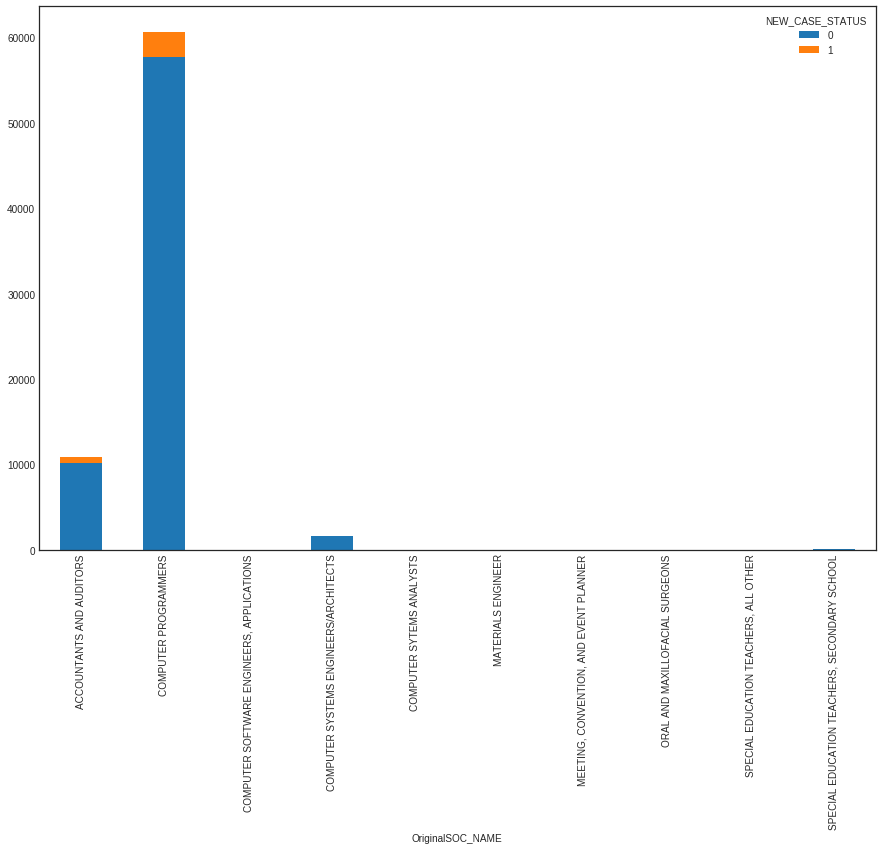

In [69]:
res = df_top_10_soc.groupby(['OriginalSOC_NAME','NEW_CASE_STATUS']).size().unstack()
res.plot(kind='bar',stacked=True,figsize=(15,10))
plt.show()

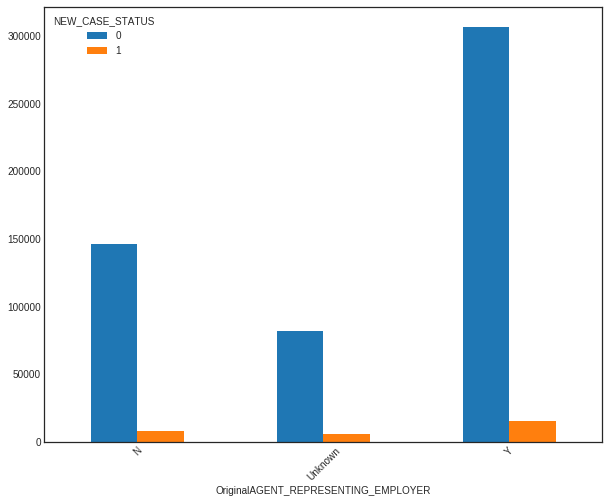

In [70]:
res = df_tot.groupby(['OriginalAGENT_REPRESENTING_EMPLOYER','NEW_CASE_STATUS']).size().unstack()
res.plot(kind='bar',stacked=False,figsize=(10,8))
plt.xticks(rotation = 45)
plt.show()